<a href="https://colab.research.google.com/github/Anna72/ML_1_term/blob/main/kfc_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

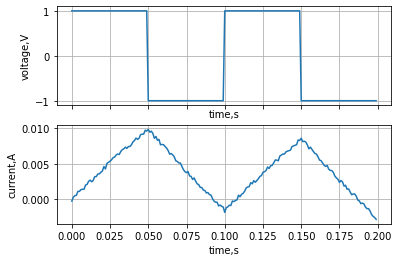

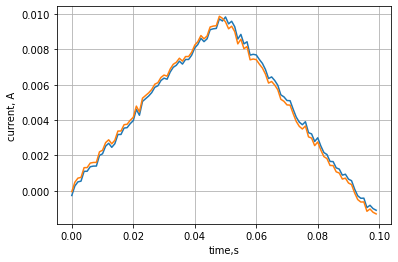

Mean value of R:  31.56009764220248 Ohms
Standart deviation of R:  6.561831099596491
Mean value of L:  4.62891451333106 H
Standart deviation of L:  0.0940021787489785


In [ ]:
#1
import numpy as np
import pandas as pd

from numpy import linalg as LA
from matplotlib import pyplot as plt

#2
#data_read = np.genfromtxt('C:\\Users\\Сергей\\Documents\\!Работа\\Учеба\\КФС\\Лабы\\Lab 1\\Lab 1. Data\\testLab1Var75.csv', delimiter=',')
data_read = np.genfromtxt('testLab1Var1.csv', delimiter=',')

time = data_read[:,0]
current = data_read[:,1]
voltage = data_read[:,2]

time = time[:,np.newaxis]
voltage = voltage[:,np.newaxis]
current = current[:,np.newaxis]

#3
fig, (ay1, ay2) = plt.subplots(2,1,sharex=True)
T_per = 0.1
ay1.plot(time[time<2*T_per],voltage[time<2*T_per])
ay1.grid()
ay1.set_xlabel('time,s')
ay1.set_ylabel('voltage,V')

ay2.plot(time[time<2*T_per],current[time<2*T_per])
ay2.grid()
ay2.set_xlabel('time,s')
ay2.set_ylabel('current,A')
plt.show()
fig.savefig('Data (part)')

#4
Td = 0.001
X = np.concatenate([voltage[0:len(voltage)-2],current[0:len(current)-2]],axis = 1)
Y = current[1:len(current)-1]
K = np.dot(np.dot(LA.inv(np.dot(X.T,X)),X.T),Y)

R = 1/K[0]*(1-K[1])
T = -Td/np.log(K[1])
L = T*R

current_est = X.dot(K)
fig, ax = plt.subplots(1,1)
plt.plot(time[time<T_per], current[time<T_per])
plt.plot(time[time<T_per],current_est[time[0:len(current)-2]<T_per])
ax.grid()
ax.set_xlabel('time,s')
ax.set_ylabel('current, A')
plt.show()
fig.savefig('Compared data(part')

#5
R_est = []
L_est = []
n = 1000

for i in range(0,n-1,1):
    ind = (time>=T_per*i)&(time<=T_per*(i+1))
    new_current = current[ind]
    new_current = new_current[:,np.newaxis]
    new_voltage = voltage[ind]
    new_voltage = new_voltage[:, np.newaxis]
    X = np.concatenate([new_voltage[0:len(new_voltage) - 2], new_current[0:len(new_current) - 2]], axis=1)
    Y = new_current[1:len(new_current) - 1]
    K = np.dot(np.dot(LA.inv(np.dot(X.T, X)), X.T), Y)

    if K[1]>0:
        R = 1/K[0]*(1-K[1])
        T = -Td / np.log(K[1])
        L = T * R
        R_est.append(R)
        L_est.append(T*R)

print('Mean value of R: ', np.mean(R_est),'Ohms')
print('Standart deviation of R: ', np.std(R_est))
print('Mean value of L: ', np.mean(L_est),'H')
print('Standart deviation of L: ', np.std(L_est))

In [ ]:
data_read


array([[ 0.0000e+00, -2.6506e-04,  1.0000e+00],
       [ 1.0000e-03,  2.7269e-04,  1.0000e+00],
       [ 2.0000e-03,  5.0741e-04,  1.0000e+00],
       ...,
       [ 9.9998e+01, -4.9711e-03, -1.0000e+00],
       [ 9.9999e+01, -5.2480e-03, -1.0000e+00],
       [ 1.0000e+02, -5.5414e-03,  1.0000e+00]])